Membuat model prediksi

# Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [ ]:
# import dataset from Google Drive
with open('/content/drive/MyDrive/Rakamin/Project/PBI Kalbe/transaction.csv','r') as data_transaction:
  data_transaction = pd.read_csv(data_transaction, delimiter=';')
with open('/content/drive/MyDrive/Rakamin/Project/PBI Kalbe/product.csv','r') as data_product:
  data_product = pd.read_csv(data_product, delimiter=';')
with open('/content/drive/MyDrive/Rakamin/Project/PBI Kalbe/store.csv','r') as data_store:
  data_store = pd.read_csv(data_store, delimiter=';')
with open('/content/drive/MyDrive/Rakamin/Project/PBI Kalbe/customer.csv','r') as data_customer:
  data_customer = pd.read_csv(data_customer, delimiter=';')

In [ ]:
data_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
data_store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [ ]:
data_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


Hal yang harus dimasukkan ke data_transaction

dari data_store
3. Group Store
4. Type
5. Latitude
6. Longitude


dari data_customer
7. Age
8. Gender
9. Marital Status
10. Income


# Merge dataset

In [ ]:
# dari data_store
merge_data_store = ['GroupStore', 'Type', 'Latitude', 'Longitude']
for store_kolom in merge_data_store:
  data_transaction[store_kolom] = data_transaction['StoreID'].map(data_store.set_index('StoreID')[store_kolom])

In [ ]:
# dari data_customer
merge_data_customer = ['Age', 'Gender', 'Marital Status', 'Income']
for customer_kolom in merge_data_customer:
  data_transaction[customer_kolom] = data_transaction['CustomerID'].map(data_customer.set_index('CustomerID')[customer_kolom])

In [ ]:
df = data_transaction.copy()

In [ ]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima,Modern Trade,"-6,2","106,816666",44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita,General Trade,"-6,966667","110,416664",27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita,General Trade,"-6,966667","110,416664",48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita,General Trade,"-6,966667","110,416664",33,0,Married,"6,95"


In [ ]:
df.shape

(5020, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price           5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   GroupStore      5020 non-null   object
 9   Type            5020 non-null   object
 10  Latitude        5020 non-null   object
 11  Longitude       5020 non-null   object
 12  Age             5020 non-null   int64 
 13  Gender          5020 non-null   int64 
 14  Marital Status  4976 non-null   object
 15  Income          5020 non-null   object
dtypes: int64(7), object(9)
memory usage: 627.6+ KB


# Data preprocessing

## Convert Tipe Data
1. Date --> datetime
2. Latitude --> float
3. Longitude --> float
4. Income --> float

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Latitude'] = df['Latitude'].str.replace(',','.').astype(float)
df['Longitude'] = df['Longitude'].str.replace(',','.').astype(float)
df['Income'] = df['Income'].str.replace(',','.').astype(float)

## Data duplicated

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikat data pada dataset

## Data Null

In [ ]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

Ada null value pada kolom Marital Status, tetapi abaikan karena tidak memakai saat modeling

# Machine Learning Regression (Time Series)

In [ ]:
df_regresi = df.groupby('Date').agg({'Qty': 'sum'}).reset_index()

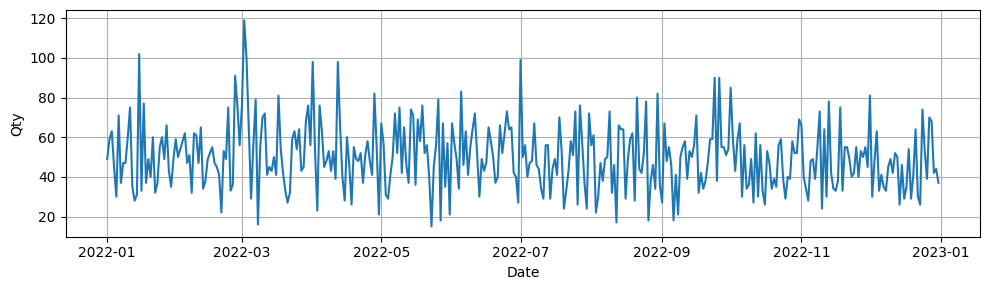

In [ ]:
plt.figure(figsize=(10, 3))  # Ukuran gambar (opsional)
plt.plot(df_regresi['Date'], df_regresi['Qty'], marker='', linestyle='-')
# plt.title('Grafik Qty terhadap Date')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

In [ ]:
df_regresi = df_regresi.set_index('Date')

## Model ARIMA

### Hyperparameter

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import sys


warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

data_train = df_regresi[:round(-365/2)]
data_test = df_regresi[round(-365/2):]

from itertools import product

p = range(0,50)
d = range(0,1)
q = range(0,10)
pdq = list(product(p, d, q))

rmse_scores = []
iterasi = 0
for i,param in enumerate(pdq,1):
  sys.stdout.write(f"\rPerulangan ke-{i}")
  sys.stdout.flush()
  model = ARIMA(df_regresi, order=param)
  model_fit = model.fit()

  # forecasting
  y_pred = model_fit.predict()

  # rmse
  mse = mean_squared_error(df_regresi.Qty, y_pred)
  rmse = np.sqrt(mse)

  rmse_scores.append({'par': param, 'rmse': rmse})
  iterasi += 1

best_rmse = min(rmse_scores,key=lambda x: x['rmse'])

Perulangan ke-500

In [ ]:
best_rmse

{'par': (49, 0, 9), 'rmse': 14.916057199148787}

### Modeling

In [ ]:
# Memuat fungsi ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_regresi, order=best_rmse['par'])
model_fit = model.fit()

In [ ]:
y_pred = model_fit.predict()
y_true = df_regresi.Qty

## Evaluasi Model

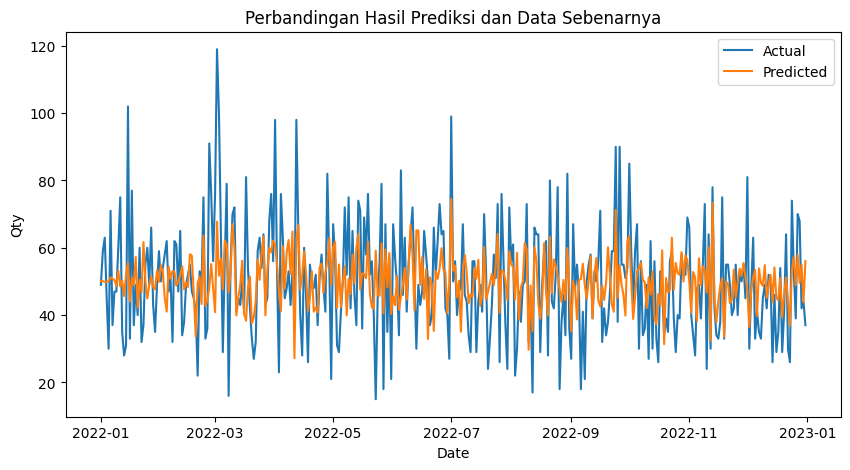

In [ ]:
# (49, 0, 9)
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('Perbandingan Hasil Prediksi dan Data Sebenarnya')
plt.legend()
plt.show()

In [ ]:
# (49,0,9)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

14.901947688046679

## Forecasting 1 Bulan ke Depan

In [ ]:
model_forecast = model_fit.forecast(31)

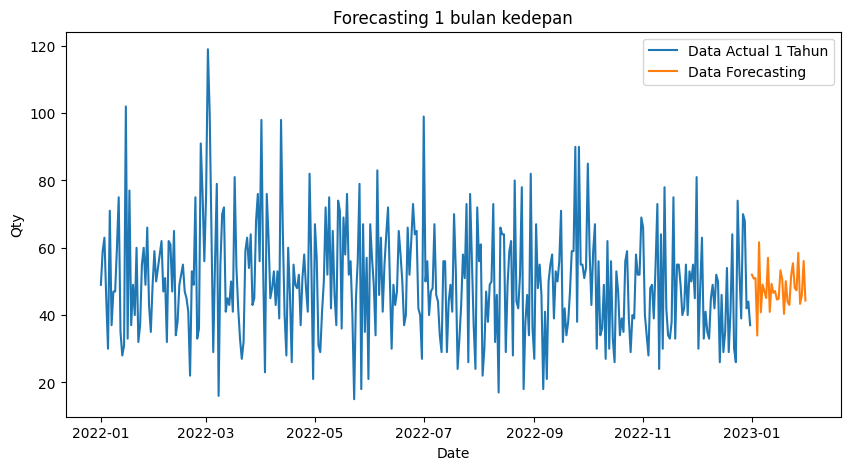

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_regresi.Qty, label='Data Actual 1 Tahun')
plt.plot(model_forecast, label='Data Forecasting')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('Forecasting 1 bulan kedepan')
plt.legend()
plt.show()

In [ ]:
model_forecast.describe()

count    31.000000
mean     48.193652
std       5.941001
min      33.924534
25%      44.471520
50%      47.363390
75%      51.391569
max      61.633707
Name: predicted_mean, dtype: float64

# Machine Learning Clustering

In [ ]:
df_cluster = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [ ]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


## Outliers

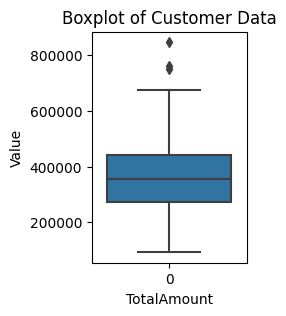

In [ ]:
plt.figure(figsize=(2, 3))  # Set the size of the figure
sns.boxplot(data=df_cluster['TotalAmount'])  # Create the boxplot
plt.title('Boxplot of Customer Data')  # Set the title of the plot
plt.xlabel('TotalAmount')  # Set the label for the x-axis
plt.ylabel('Value')  # Set the label for the y-axis
plt.show()  # Show the plot

Sepertinya ada outliers pada kolom TotalAmount

### Handling Outliers

In [ ]:
Q1 = df_cluster.TotalAmount.quantile(0.25)
Q3 = df_cluster.TotalAmount.quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [ ]:
df_cluster = df_cluster[(df_cluster.TotalAmount >= lower_bound) & (df_cluster.TotalAmount <= upper_bound)]

In [ ]:
df_cluster.shape

(444, 4)

## Standard Scaler

In [ ]:
cluster = df_cluster[['Qty', 'TotalAmount']]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cluster_scaled = sc.fit_transform(cluster)

In [ ]:
df_cluster_scaled = pd.DataFrame(cluster_scaled, columns=cluster.columns)

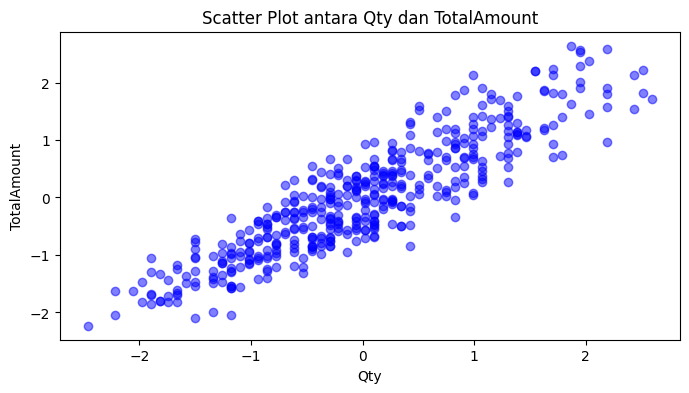

In [ ]:
# Qty dengan TotalAmont
plt.figure(figsize=(8, 4))
plt.scatter(df_cluster_scaled.Qty, df_cluster_scaled.TotalAmount, alpha=0.5, color='blue')
plt.title('Scatter Plot antara Qty dan TotalAmount')
plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.show()

## WCSS vs K-Values
mencari K optimal

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
  model.fit(cluster_scaled)
  wcss.append(model.inertia_)
print(wcss)

[888.0, 335.22903485391464, 179.37488635475876, 127.11271283446052, 98.16843732512494, 81.85050484366049, 69.95130118331821, 61.447716753322496, 55.03076354506749, 49.43224527395344]


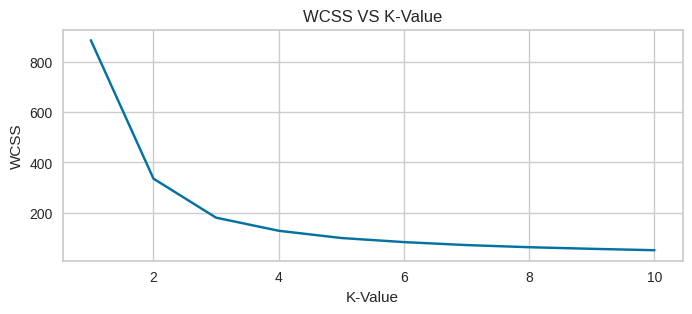

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss)
plt.title('WCSS VS K-Value')
plt.xlabel('K-Value')
plt.ylabel('WCSS')

plt.show()

Terlihat WCSS mulai stabil pada K-Value = 3

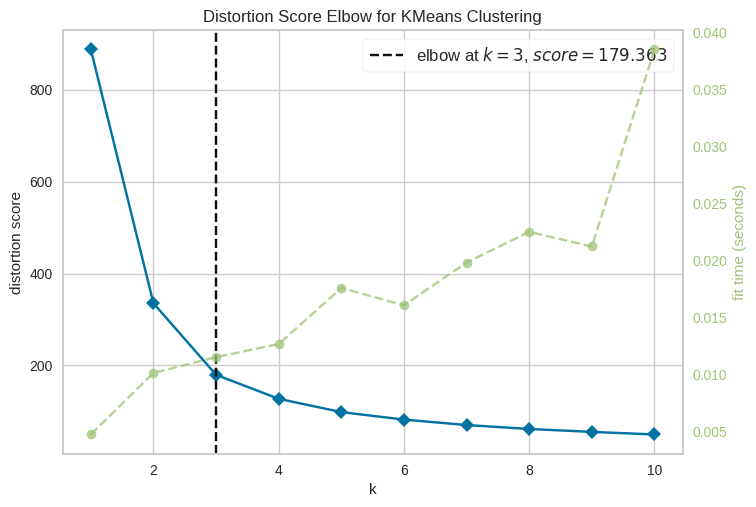

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Elbow Method with yellowbrick library
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(cluster_scaled)
visualizer.show()

Menggunakan yellowbrick library menunjukkan K-Value = 3

## Modeling

In [ ]:
# K-Value = 3
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters = 3,init='k-means++',max_iter=300,n_init=10,random_state=42)
kmeans_3.fit(cluster_scaled)
df_cluster['Cluster'] = kmeans_3.labels_
# kmeans_3.labels_

<ipython-input-25-78874a6fec67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans_3.labels_


<Axes: xlabel='Qty', ylabel='TotalAmount'>

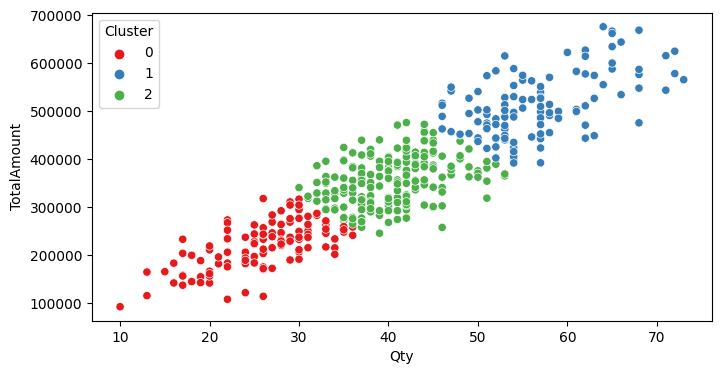

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=df_cluster, x='Qty', y='TotalAmount', hue='Cluster',palette='Set1')

## Evaluasi Model
Sillhoute Score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cluster_scaled, kmeans_3.labels_)
silhouette_avg

0.4751904186934808

In [ ]:
df_cluster.groupby('Cluster').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

,Cluster,TransactionID,Qty,TotalAmount
0,0,122,3187,27154200
1,1,116,6578,59546700
2,2,206,8306,72983400
